# Liu Xingyu - DAV 6150 - Project 1

## Introduction

In this project, I will analyze on a data set consisting of 15 characteristics of wine to construct two multiple regression models, three different Poisson regression models, two different negative binomial regression models and one zero-inflated Poisson regression model.

I will first perform an exploratory data analysis, then, based on the results of my EDA, I will perform the data preparation and cleaning in order to prepare the data for use. 

After the data preparation I will perform feature selection by using different methods: Based on correlation matrix and backward elimination selection.

Then I will use one data set from github repository to train the model, use the other data set from github repository to evaluate the predictions of models. 

Lastly, I will choose the best regression model from those I constructed.

## Data Profiling & Domain Knowledge Development

The data profiling is from assignment 3, and assignment 3's data profiling is partially referenced from website, but I did not give link in that assignemnt, and I could not find the original link now, So in this project partially information and link is from S_Ferrari's data link:

- **INDEX**: The Unique ID of wine, it assigns unique codes to different wines. It's a little like ISBN for books. Each wine has a unique numerical code and display name which can be shared automatically.
- **AcidIndex**: Measures total acidity of wine via a weighted average.
- **Alcohol**: Alcohol Content, the percent alcohol content of the wine
- **Chlorides**: Chloride content of the wine, the amount of salt in the wine, usually wine contains from 2 to 4 g/L of salts of mineral acids.
- **CitricAcid**: Citric Acid content of the wine, found in small quantities, citric acid can add ‘freshness’ and flavor to wines
- **Density**: Density of the wine, the density of water is close to that of water depending on the percent alcohol and sugar content
- **FixedAcidity**: FixedAcidity of the wine, do not evaporate readily, from [this link](https://waterhouse.ucdavis.edu/whats-in-wine/fixed-acidity)
- 1 to 4 g/L tartaric acid
- 0 to 8 g/L malic acid
- 0 to 0.5 g/L citric acid
- 0.5 to 2 g/L succinic acid
- 1.5 to 14.5 g/L when added up
- **FreeSulfurDioxide**: Sulfur Dioxide content of the wine. the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine
- **LabelAppeal**: Subjective marketing score that indicates the appeal of the design of the label on the bottle
- **ResidualSugar**: Residual sugar content of the wine, the amount of sugar remaining after fermentation stops, it’s rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet. According to [this link](http://www.moundtop.com/pdf/Winemaking-ResidualSugar.pdf), the Residual Sugar value in wine can vary from 1-2g/L up to 100-200g/L. 
- **STARS**: Wine rating as determined by experts (4 = excellent; 1 =Poor)
- **Sulphates**: Sulfate content of the wine, a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant
- **TotalSulfurDioxide**: Total sulfur dioxide content of the wine, amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine. The maximum allowable concentration for a bottled wine is: 350 ppm (mg/L) of TSO2. according to [this link](https://www.extension.iastate.edu/wine/total-sulfur-dioxide-why-it-matters-too)
- **VolatileAcidity**: Volatile acid content of the wine, the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste. Usually there are maximum 1.4 g/L for red wine and 1.2 g/L for white wine. According to [this link](https://extension.psu.edu/volatile-acidity-in-wine#:~:text=Volatile%20acidity%20(VA)%20is%20a%20measure%20of%20the%20wine's%20volatile,smell%20and%20taste%20of%20vinegar.)
- 1.4 g/L for red wine 
- 1.2 g/L for white wine
- **pH**: pH of the wine, describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale, so I will set the threshold of 2 and 5 here.

## Exploratory Data Analysis

First I will import the data from github repository:

In [224]:
#import the file and important packages
!pip install missingno
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

import statsmodels.api as sm

#next read in the file
filename = 'https://raw.githubusercontent.com/Bella1025/DAV6150./master/M3_Data.csv'
wine = pd.read_csv(filename)

#check results
wine.head()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,1,3,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,-0.59,9.9,0,8,2.0
1,2,3,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,4,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,5,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,6,4,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


First I want to check what the types of data are in different features, check what are categorical variables, what are numeric variables, what type of numeric values are in numeric variables:

In [225]:
#check the types of data 
wine.dtypes

INDEX                   int64
TARGET                  int64
FixedAcidity          float64
VolatileAcidity       float64
CitricAcid            float64
ResidualSugar         float64
Chlorides             float64
FreeSulfurDioxide     float64
TotalSulfurDioxide    float64
Density               float64
pH                    float64
Sulphates             float64
Alcohol               float64
LabelAppeal             int64
AcidIndex               int64
STARS                 float64
dtype: object

After checking data types, I found there are 16 numeric attributes, of which 12 are float types and 4 are int types.

In [226]:
#Do a descriptive statistics check on data
wine_desc = wine.describe()
wine_desc

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,8069.980305,3.029074,7.075717,0.324104,0.308413,5.418733,0.054822,30.845571,120.714233,0.994203,3.207628,0.527112,10.489236,-0.009066,7.772724,2.041755
std,4656.905107,1.926368,6.317643,0.784014,0.862080,33.749379,0.318467,148.714558,231.913211,0.026538,0.679687,0.932129,3.727819,0.891089,1.323926,0.902540
min,1.000000,0.000000,-18.100000,-2.790000,-3.240000,-127.800000,-1.171000,-555.000000,-823.000000,0.888090,0.480000,-3.130000,-4.700000,-2.000000,4.000000,1.000000
25%,4037.500000,2.000000,5.200000,0.130000,0.030000,-2.000000,-0.031000,0.000000,27.000000,0.987720,2.960000,0.280000,9.000000,-1.000000,7.000000,1.000000
50%,8110.000000,3.000000,6.900000,0.280000,0.310000,3.900000,0.046000,30.000000,123.000000,0.994490,3.200000,0.500000,10.400000,0.000000,8.000000,2.000000
75%,12106.500000,4.000000,9.500000,0.640000,0.580000,15.900000,0.153000,70.000000,208.000000,1.000515,3.470000,0.860000,12.400000,1.000000,8.000000,3.000000
max,16129.000000,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


### After descriptive statistic checking on data, I found:

- 1. There are 12157 counts in ResidualSugar, 12157 counts in Chlorides, 12148 counts in FreeSulfurDioxide, 12113 counts in TotalSulferDioxide, 12400 counts in pH, 11585 counts in Sulphates, 12142 counts in Alcohol, 9436 counts in STARS. From these information, I guessed that ResidualSugar has 12795 - 12179 = 616 missing values, Chlorides has 12795 - 12157 = 638 missing values, FreeSulfurDioxide has 12795 - 12148 = 647 missing values, TotalSulfurDioxide has 12795 - 12113 = 682 missing values, pH has 12795 - 12400 = 395 missing values, Sulphates has 12795 - 11585 = 1210 missing values, Alcohol has 12795 - 12142 = 653 missing values, STARS has 12795 - 9436 = 3359 missing values.

- 2. Attribute LabelAppeal's mean is a negative value, which means there might be a lot of negative values in this attribute, the min value of FixedAcidity, VolatileAcidity, CitricAcid, ResidualSugar, Chlorides, FreeSulfurDioxide, TotalSulfurDioxide, Sulphates, Alcohol and LabelAppeal are negative values, which means these attributes have negative values. The min value of INDEX, Density, pH, AcidIndex, STARS are positve, which means those attributes do not have negative values.

- 3. The min value of TARGET is 0.00, which means the TARGET are non-negative values, and there might be a lot of zeros inside.

- 4. 25% of ResidualSugar values are -2.00, 25% of Chlorides values are -0.031, 25% of LabelAppeal values are -1.00, which means these attributes have the most numbers of negative values.

Next I will look at the distributions of my data:

### Plot histograms of variables:

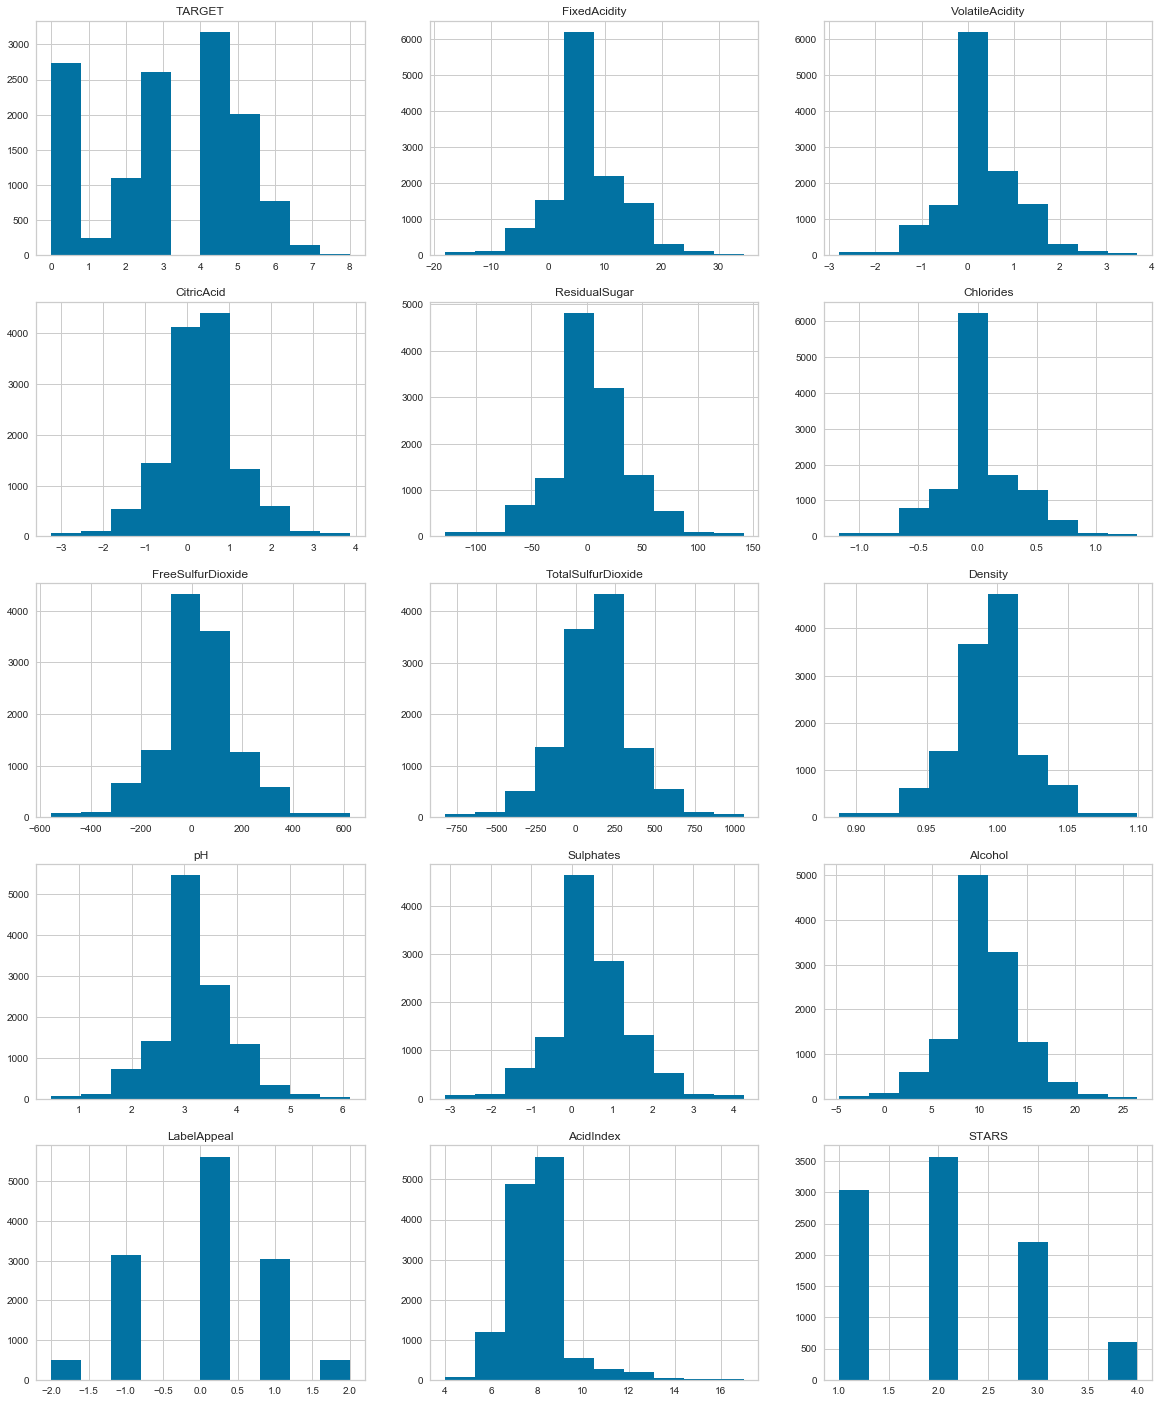

In [227]:
#ignore warnings
np.warnings.filterwarnings('ignore')

plt.figure(figsize=(20,25))

i=1
columns=wine.columns.tolist()
for k in columns[1:] :  ## Kick the Index column because every wine has one unique Index 
    plt.subplot(5,3,i) 
    plt.hist(wine[k])
    plt.title('%s' %k)
    i=i+1 

#show results    
plt.show()

Next I will look at boxplots of the data to see if there are any outliers:

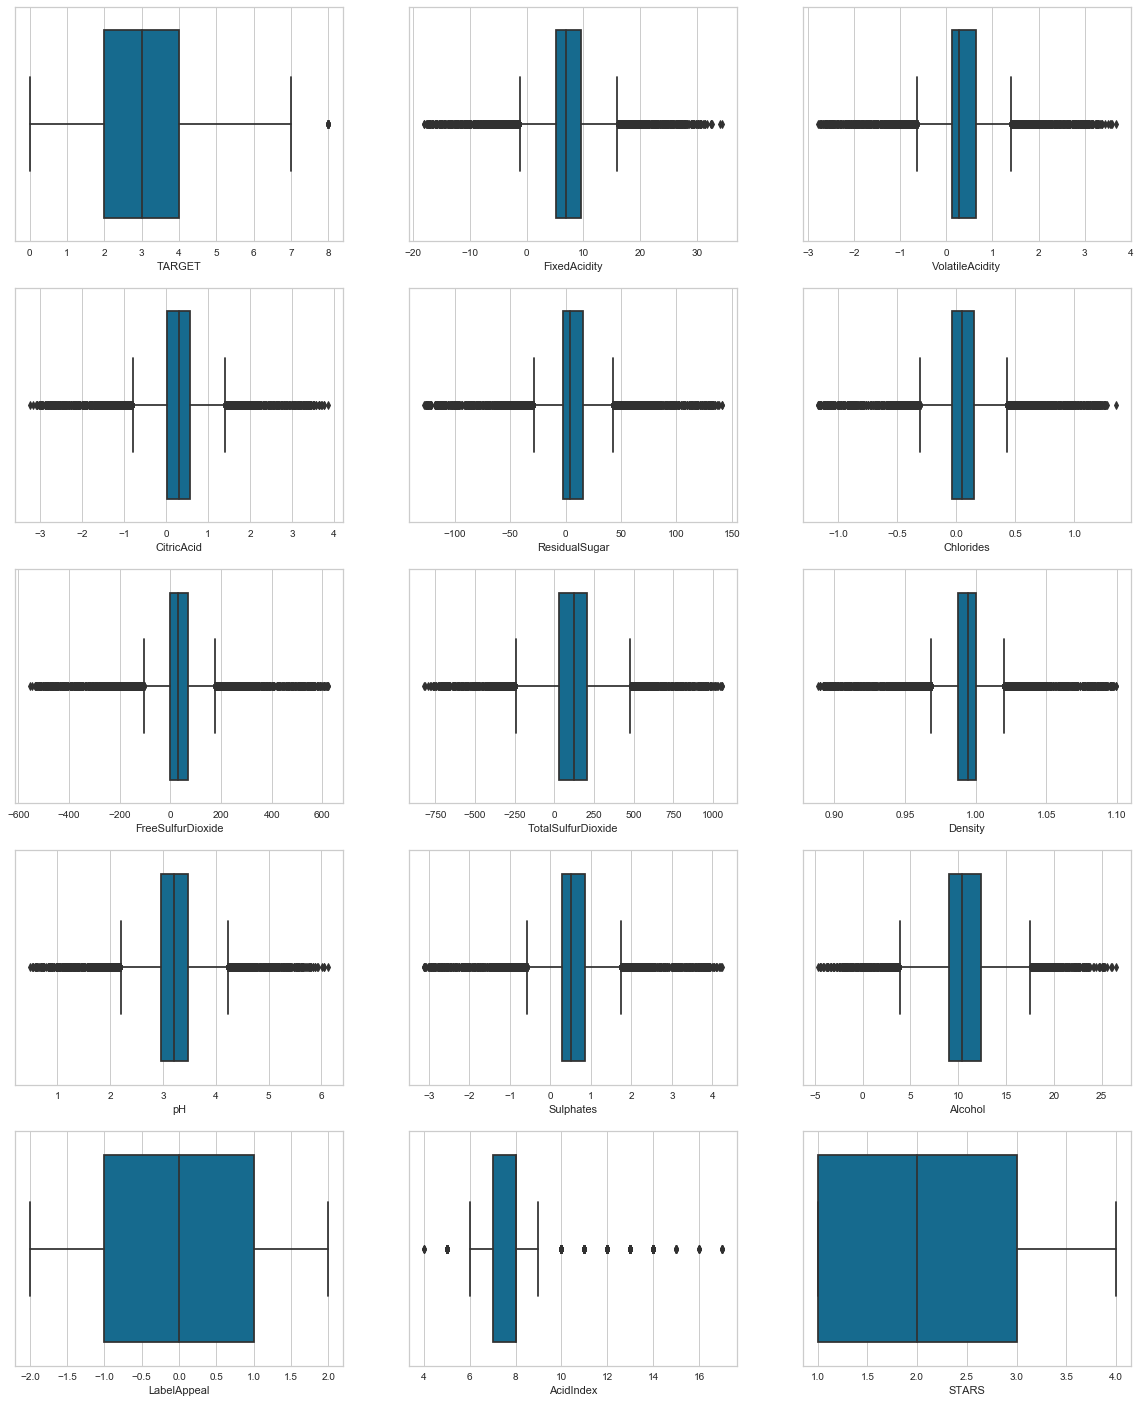

In [228]:
plt.figure(figsize=(20,25))

i=1
columns=wine.columns.tolist()
for k in columns[1:] :   ##Kick out the variable that outliers are meaningless for it: Index 
    plt.subplot(5,3,i) 
    sns.boxplot(x=k,data=wine)
    i=i+1 

#show results
plt.show()

### Observations regarding variables: 

- STARS has most values concentrated in the STAR 2.0. Only a small proportion is in the STAR 4.0.
- TARGET has most values concentrated in the range 2.0 - 4.0. Only a small proportion is in the 8.0.
- Fixed acidity, volatile acidity and citric acid, ResidualSugar, Chlorides, FreeSulfurDioxide, TotalSulfurDioxide, Density, pH and Sulphates and Alcohol have outliers. If those outliers are eliminated distribution of the variables may be taken to be symmetric.
- Some of the variables, e.g . AcidIndex, have a few outliers but is very different from the rest.
- Outliers are on the both sides.

### Conclusion till now:
- I see that Fixed Acidity, Volatile Acidity, Citric Acid, Residual Sugar, Chlorides, FreeSulfurDioxide, TotalSulfurDioxde, Density, pH, Sulphates, Alcohol, AcidIndex are approximately normally distributed.
- The distributon of AcidIndex is skewed right. Chlorides, pH and Sulphates are skewed left.

## Dealing with missing data:
### Check the proportion of missing values in each attribute:

- From the first descriptive statistic checking, I could have guessed that ResidualSugar has 12795 - 12179 = 616 missing values, Chlorides has 12795 - 12157 = 638 missing values, FreeSulfurDioxide has 12795 - 12148 = 647 missing values, TotalSulfurDioxide has 12795 - 12113 = 682 missing values, pH has 12795 - 12400 = 395 missing values, Sulphates has 12795 - 11585 = 1210 missing values, Alcohol has 12795 - 12142 = 653 missing values, STARS has 12795 - 9436 = 3359 missing values. So Let's truly checked whether my guess is right:

In [229]:
# check the dataset for null values
wine.isnull().sum()

INDEX                    0
TARGET                   0
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar          616
Chlorides              638
FreeSulfurDioxide      647
TotalSulfurDioxide     682
Density                  0
pH                     395
Sulphates             1210
Alcohol                653
LabelAppeal              0
AcidIndex                0
STARS                 3359
dtype: int64

Check the proportion of missing values:

In [230]:
null_cols = ['ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'pH', 'Sulphates', 'Alcohol','STARS']
total_rows = wine.shape[0]
for each_col in null_cols:
    print('{}:{}'.format(each_col, wine[pd.isnull(wine[each_col])].shape[0] / total_rows))

ResidualSugar:0.04814380617428683
Chlorides:0.0498632278233685
FreeSulfurDioxide:0.050566627588901916
TotalSulfurDioxide:0.05330207112153185
pH:0.03087143415396639
Sulphates:0.09456819069949199
Alcohol:0.051035560765924186
STARS:0.2625244236029699


- The result shows that STARS has the most proportion of missing values, amounts to 26%. 

### Then let me check whether those missing values have correlated with other variables:

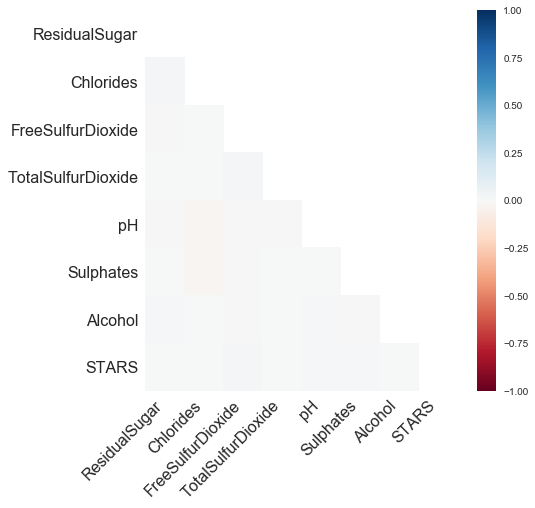

In [231]:
import missingno as msno
ax = msno.heatmap(wine, figsize = (7,7))
ax.get_figure(); 

The figure above shows the missing values have very less correlations with each other.
- Sulphates have a little correlations with Chlorides, but that is reasonable in Chemical knowledge.
- Next, I will check whether the missing values displays some patterns:

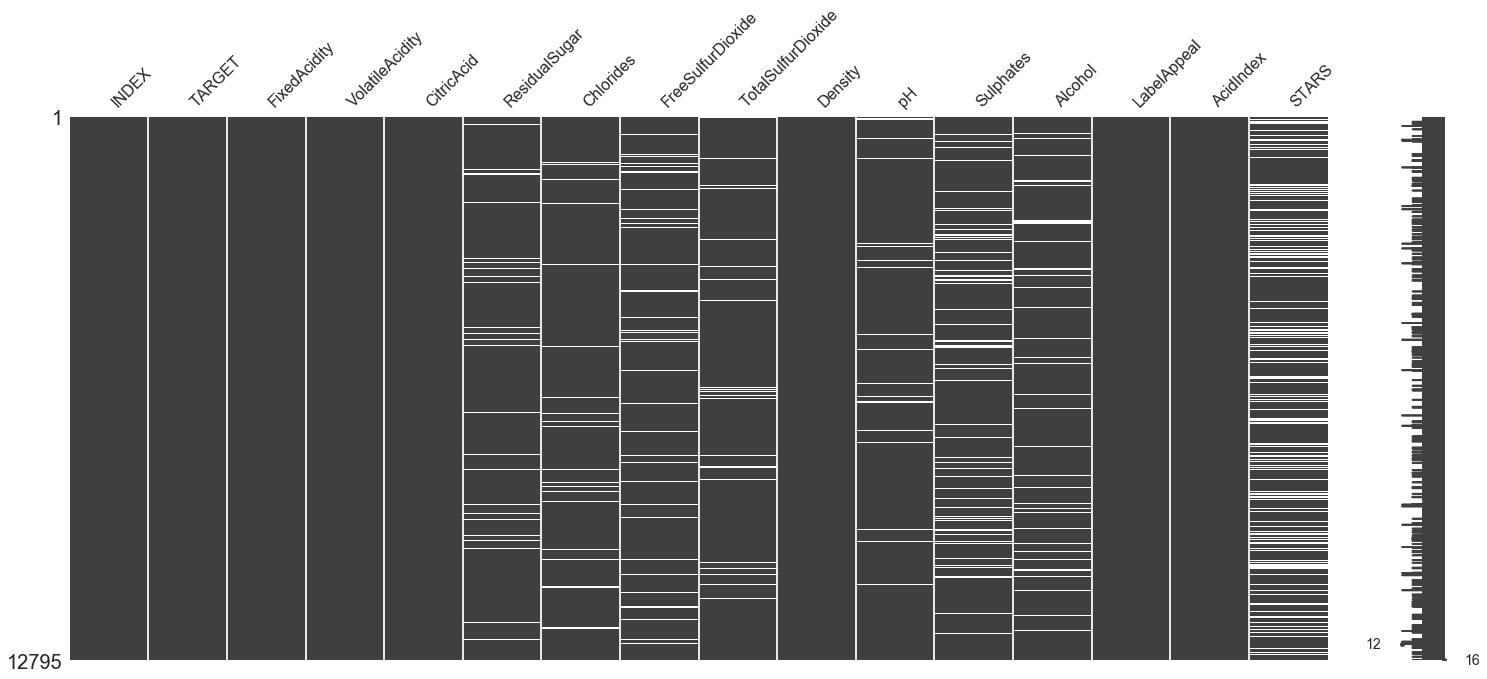

In [232]:
x = msno.matrix(wine)
x.get_figure();

### The missing data did not show any pattern, so they are randomly missing values.

Next I will impute the missing values in all the other columns using Scikit-Learn's K-Nearest-Neighbors function (KNN). 

However, I will replace missing values in STARS with 0.0, because KNN method may impute non-integer values to it.

In [233]:
impute=wine.iloc[:,1:].copy()
impute['STARS']=impute['STARS'].replace(np.nan, 0)

from sklearn.impute import KNNImputer
#impute the values using K value of square root of size of data
imputer = KNNImputer(n_neighbors=81, weights="uniform")
imputknn=pd.DataFrame(imputer.fit_transform(impute)
                                ,columns=impute.columns.tolist())
#show results
imputknn.head()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,3.0,3.2,1.160,-0.98,54.2,-0.567000,52.401235,268.0,0.99280,3.33,-0.59,9.900000,0.0,8.0,2.0
1,3.0,4.5,0.160,-0.81,26.1,-0.425000,15.000000,-327.0,1.02792,3.38,0.70,10.133333,-1.0,7.0,3.0
2,5.0,7.1,2.640,-0.88,14.8,0.037000,214.000000,142.0,0.99518,3.12,0.48,22.000000,-1.0,8.0,3.0
3,3.0,5.7,0.385,0.04,18.8,-0.425000,22.000000,115.0,0.99640,2.24,1.83,6.200000,-1.0,6.0,1.0
4,4.0,8.0,0.330,-1.26,9.4,0.060543,-167.000000,108.0,0.99457,3.12,1.77,13.700000,0.0,9.0,2.0


- See what the data has changed now:

In [234]:
imputknn_desc = imputknn.describe()
imputknn_desc

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000
mean,3.029074,7.075717,0.324104,0.308413,5.301981,0.055785,31.237413,120.504425,0.994203,3.209231,0.528860,10.487184,-0.009066,7.772724,1.505744
std,1.926368,6.317643,0.784014,0.862080,32.938607,0.310531,144.950238,225.735512,0.026538,0.669276,0.887616,3.632586,0.891089,1.323926,1.186538
min,0.000000,-18.100000,-2.790000,-3.240000,-127.800000,-1.171000,-555.000000,-823.000000,0.888090,0.480000,-3.130000,-4.700000,-2.000000,4.000000,0.000000
25%,2.000000,5.200000,0.130000,0.030000,-0.650000,-0.001000,5.000000,34.000000,0.987720,2.970000,0.330000,9.100000,-1.000000,7.000000,0.000000
50%,3.000000,6.900000,0.280000,0.310000,3.700000,0.047000,31.000000,122.000000,0.994490,3.200000,0.510000,10.400000,0.000000,8.000000,1.000000
75%,4.000000,9.500000,0.640000,0.580000,14.900000,0.130000,65.000000,198.000000,1.000515,3.450000,0.770000,12.200000,1.000000,8.000000,2.000000
max,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


In [235]:
imputknn.shape

(12795, 15)

## Dealing with negative values:

### There are some negative values in chemical content, which is meaningless in real life, so Let's deal with those negative values:

- Check the number of negative values in the data set:

In [236]:
#look at invalid negative values in the datset
# Reference from S_Ferrari's code

data_neg = imputknn[['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 
                     'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Sulphates', 'Alcohol']]

count_neg=[]
count=0
for col in data_neg.columns:
    for i in range(len(data_neg)):
        if data_neg[col][i] < 0:
            count+=1
    count_neg.append(count)
    count=0
neg_num_df = pd.DataFrame()
neg_num_df['Column'] = ['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Sulphates', 'Alcohol']
neg_num_df['Number of Negative'] = pd.DataFrame({'Number of Negative': count_neg})
neg_num_df

,Column,Number of Negative
0,FixedAcidity,1621
1,VolatileAcidity,2827
2,CitricAcid,2966
3,ResidualSugar,3255
4,Chlorides,3204
5,FreeSulfurDioxide,3041
6,TotalSulfurDioxide,2504
7,Sulphates,2361
8,Alcohol,118


After imputing, there are a lot of negative values existing, I will try whether delete the negative values along with invalid values could change the distributions too much:

In [237]:
imputknn2 = imputknn.copy()
#remove rows that have a Fixed Acidity are negative
imputknn2=imputknn2[imputknn2.FixedAcidity>0]

#remove rows that have a volatile acidity above 1.4 and are also negative
imputknn2=imputknn2[(imputknn2.VolatileAcidity<=1.4)&(imputknn2.VolatileAcidity>0)]

#remove rows that have a Citric Acid are negative
imputknn2=imputknn2[imputknn2.CitricAcid>0]

#remove rows that have a Residual Sugar are negative
imputknn2=imputknn2[imputknn2.ResidualSugar>0]

#remove rows that have a Chlorides are negative
imputknn2=imputknn2[imputknn2.Chlorides>0]

#remove rows that have a free sulfur dioxide value above 350 and are also negative
imputknn2=imputknn2[(imputknn2.FreeSulfurDioxide<=350) & (imputknn2.FreeSulfurDioxide>0)] 

#remove rows that have a total sulfur dioxide value above 350 and are also negative
imputknn2=imputknn2[(imputknn2.TotalSulfurDioxide<=350) & (imputknn2.TotalSulfurDioxide>0)]

#remove rows where the free sulfur dioxide value is greater than the total sulfur dioxide value and also negative
imputknn2=imputknn2[(imputknn2.FreeSulfurDioxide<=imputknn2.TotalSulfurDioxide)] 

#remove rows that have a Sulphates are negative
imputknn2=imputknn2[imputknn2.Sulphates>0]

#remove rows that have a Alcohol are negative
imputknn2=imputknn2[imputknn2.Alcohol>0]

#remove rows that have a pH value of less than 2 or greater than 5 and also negative
imputknn2=imputknn2[((imputknn2.pH >2) & (imputknn2.pH<5))]
             
#check shape
imputknn2.shape

(903, 15)

Plot the histograms again to see whether my transformation changed the distributions:

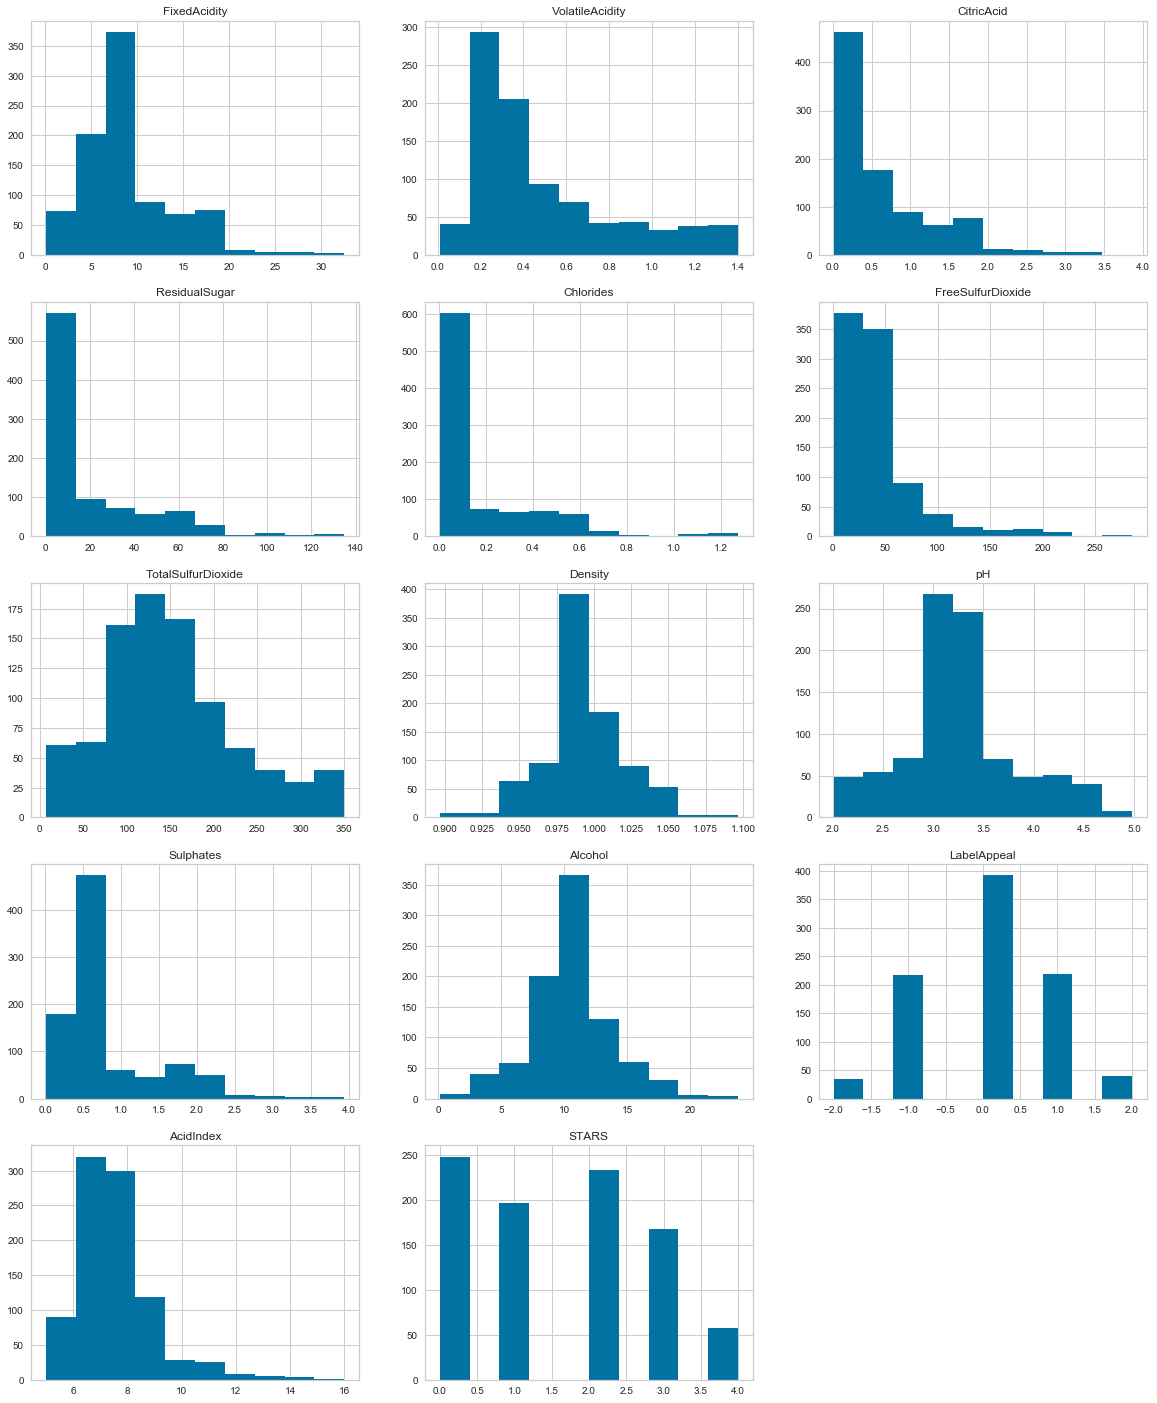

In [238]:
#ignore warnings
np.warnings.filterwarnings('ignore')

plt.figure(figsize=(20,25))

i=1
columns=imputknn2.columns.tolist()
for k in columns[1:] :  
    plt.subplot(5,3,i) 
    plt.hist(imputknn2[k])
    plt.title('%s' %k)
    i=i+1 

#show results    
plt.show()

Plot the Boxplots again to see whether my transformation changed the boxplots:

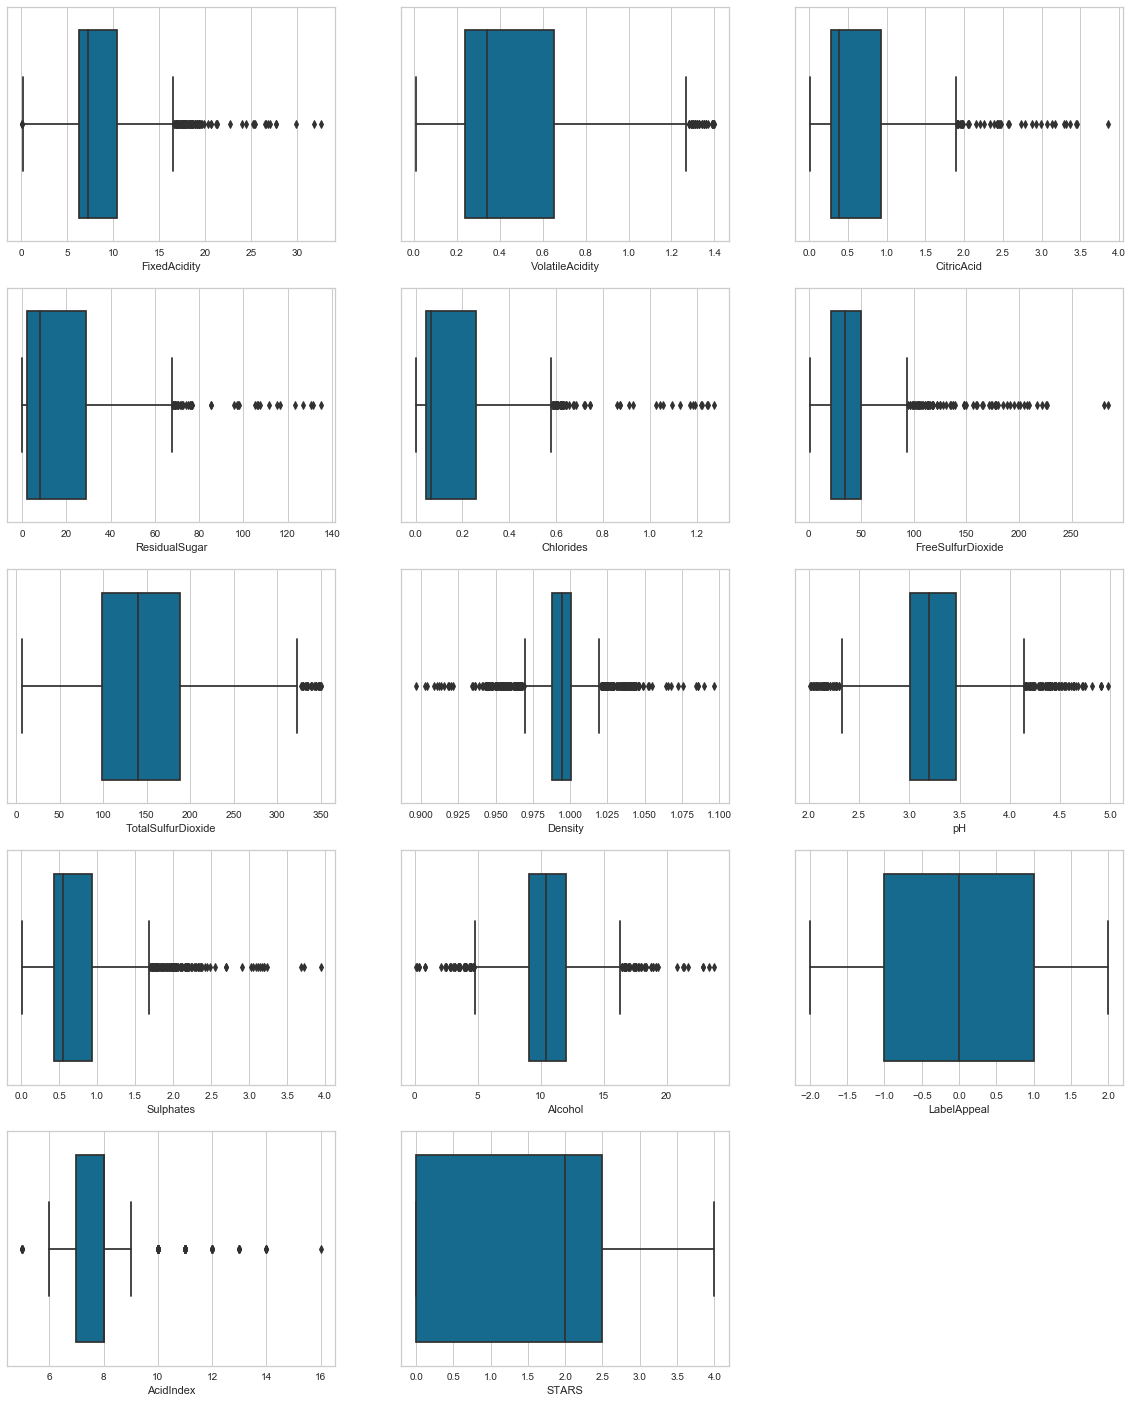

In [239]:
plt.figure(figsize=(20,25))

i=1
columns=imputknn2.columns.tolist()
for k in columns[1:] :   ##Kick out the variable that outliers are meaningless for it: Index 
    plt.subplot(5,3,i) 
    sns.boxplot(x=k,data=imputknn2)
    i=i+1 

#show results
plt.show()

### Conclusion till now:
- I see that Volatile Acidity, Citric Acid, Residual Sugar, Chlorides, FreeSulfurDioxide, TotalSulfurDioxde, Sulphates has become skewed distributed after the transformation.
- The points from the left side of boxplots of VolatileAcidity, CitricAcid, ResidualSugar, Chlorides, FreeSulfurDioxide has been eliminated.

Therefore, simply deleting the negative values cause the distributions change too much, also after deleting negative values, there are only 904 rows left, which leave the data set has little information to analyze, I could try to use the absolute values to substitute the negative values other than deleting the negative values:

In [240]:
#perform transformation on label appeal as so that I do not have any negative values but do not change the distribution
imputknn['LabelAppeal']=imputknn['LabelAppeal']+2

#get the absolute values of the new data frame to delete the negative values
wine2=imputknn.abs().copy()

#check results
wine2.head()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,3.0,3.2,1.160,0.98,54.2,0.567000,52.401235,268.0,0.99280,3.33,0.59,9.900000,2.0,8.0,2.0
1,3.0,4.5,0.160,0.81,26.1,0.425000,15.000000,327.0,1.02792,3.38,0.70,10.133333,1.0,7.0,3.0
2,5.0,7.1,2.640,0.88,14.8,0.037000,214.000000,142.0,0.99518,3.12,0.48,22.000000,1.0,8.0,3.0
3,3.0,5.7,0.385,0.04,18.8,0.425000,22.000000,115.0,0.99640,2.24,1.83,6.200000,1.0,6.0,1.0
4,4.0,8.0,0.330,1.26,9.4,0.060543,167.000000,108.0,0.99457,3.12,1.77,13.700000,2.0,9.0,2.0


Then I will delete the invalid values this time:

In [241]:
#remove rows that have a volatile acidity above 1.4
wine2=wine2[(wine2.VolatileAcidity<=1.4)]

#remove rows that have a free sulfur dioxide value above 350
wine2=wine2[(wine2.FreeSulfurDioxide<=350)] 

#remove rows that have a total sulfur dioxide value above 350
wine2=wine2[(wine2.TotalSulfurDioxide<=350)]

#remove rows where the free sulfur dioxide value is greater than the total sulfur dioxide value and also negative
wine2=wine2[(wine2.FreeSulfurDioxide<=wine2.TotalSulfurDioxide)] 

#remove rows that have a pH value of less than 2 or greater than 5 and also negative
wine2=wine2[((wine2.pH >2) & (wine2.pH<5))]
             
#check shape
wine2.shape

(6293, 15)

Plot the histograms again to see whether my transformation changed the distributions:

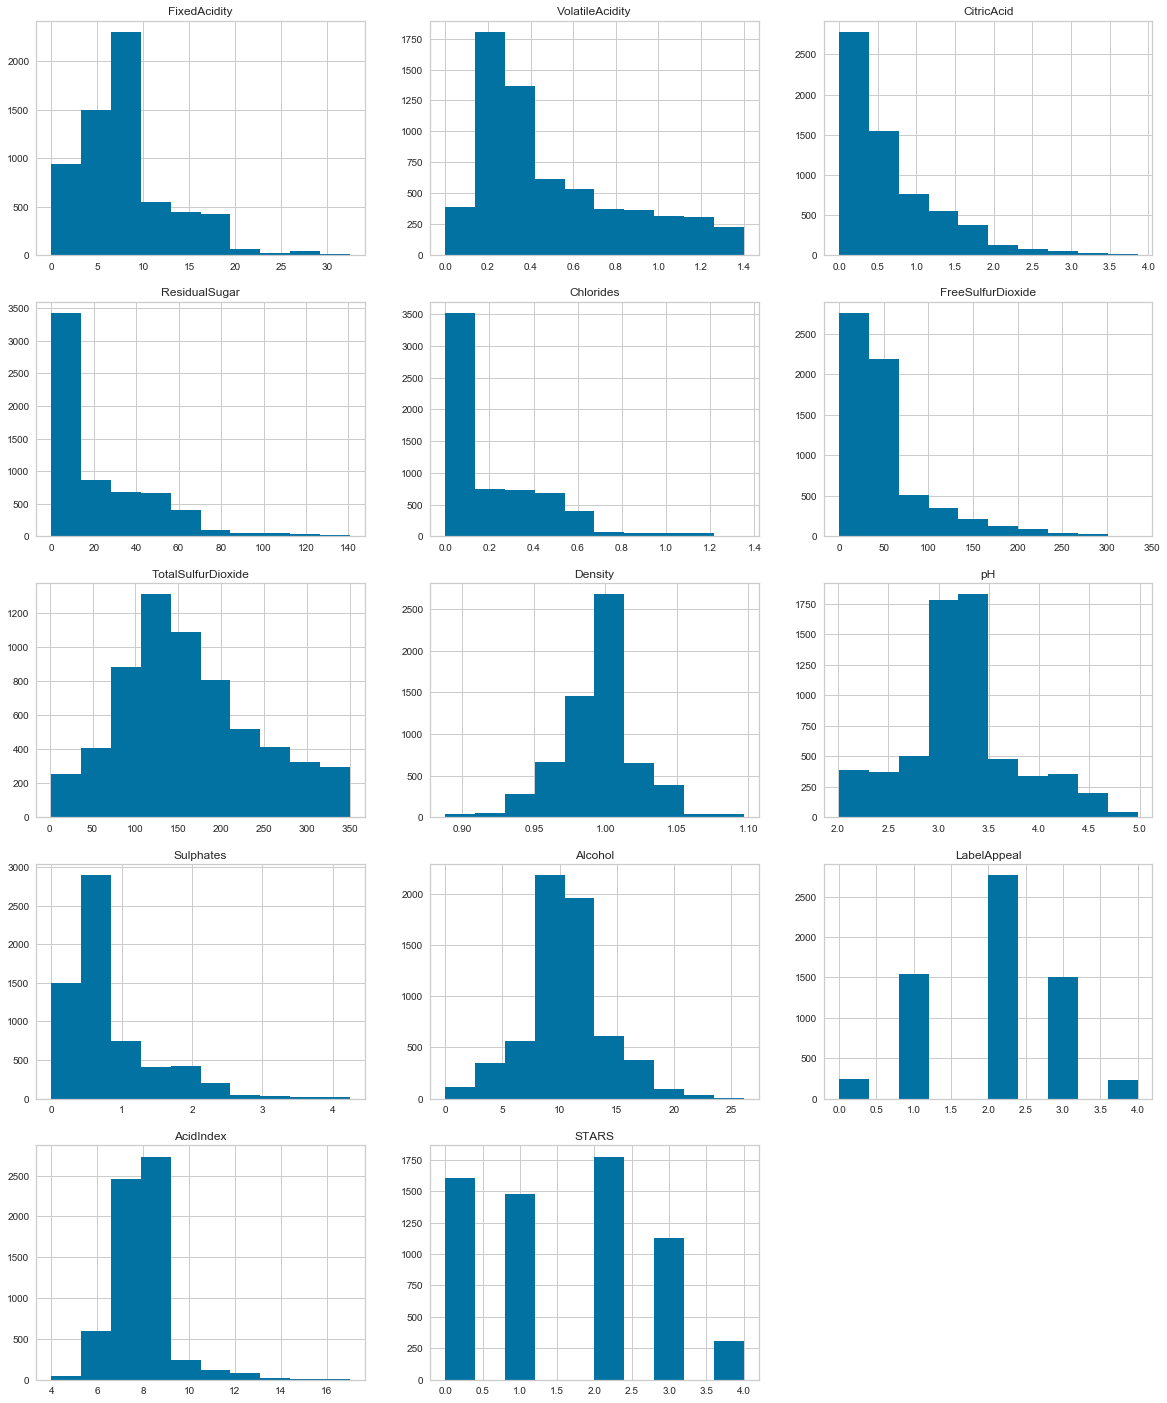

In [242]:
#ignore warnings
np.warnings.filterwarnings('ignore')

plt.figure(figsize=(20,25))

i=1
columns=wine2.columns.tolist()
for k in columns[1:] :  
    plt.subplot(5,3,i) 
    plt.hist(wine2[k])
    plt.title('%s' %k)
    i=i+1 

#show results    
plt.show()

Plot the Boxplots again to see whether my transformation changed the boxplots:

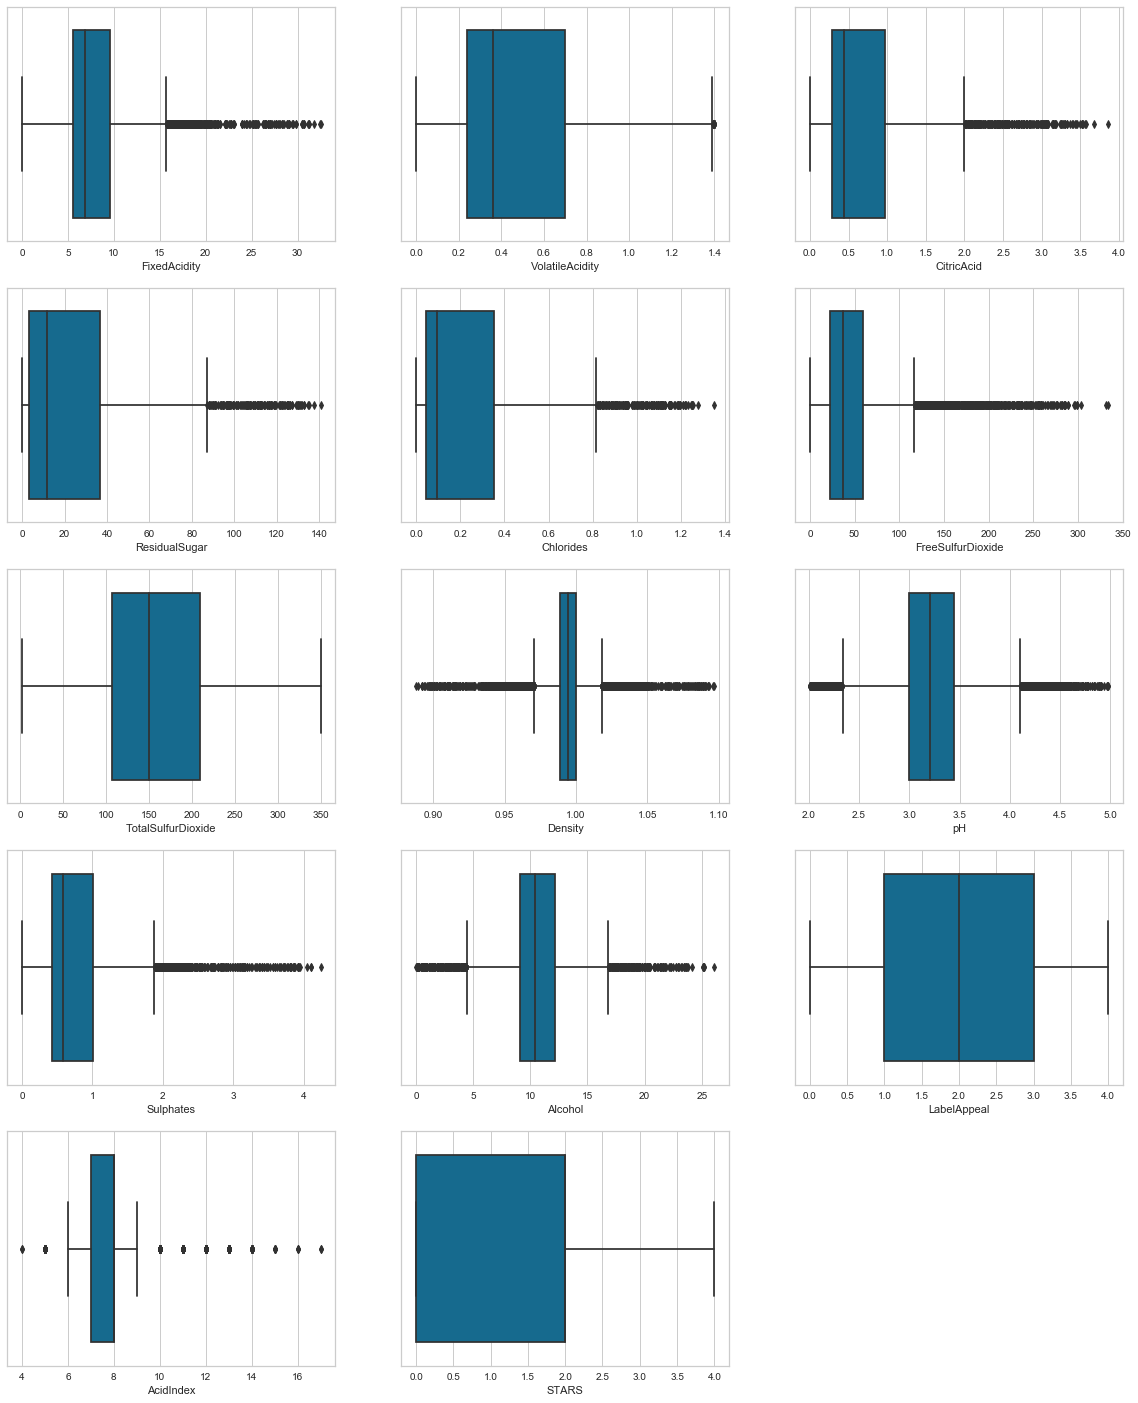

In [243]:
plt.figure(figsize=(20,25))

i=1
columns=wine2.columns.tolist()
for k in columns[1:] :   ##Kick out the variable that outliers are meaningless for it: Index 
    plt.subplot(5,3,i) 
    sns.boxplot(x=k,data=wine2)
    i=i+1 

#show results
plt.show()

After transformation, there are 6295 rows left, so I will not further delete any values more because it will cause too sparse data to be analyzed. 

## Feature Selection

### 1. Selecting features by correlation heatmap

Plot the correlation map again to see which variables have strong correlations with target value:

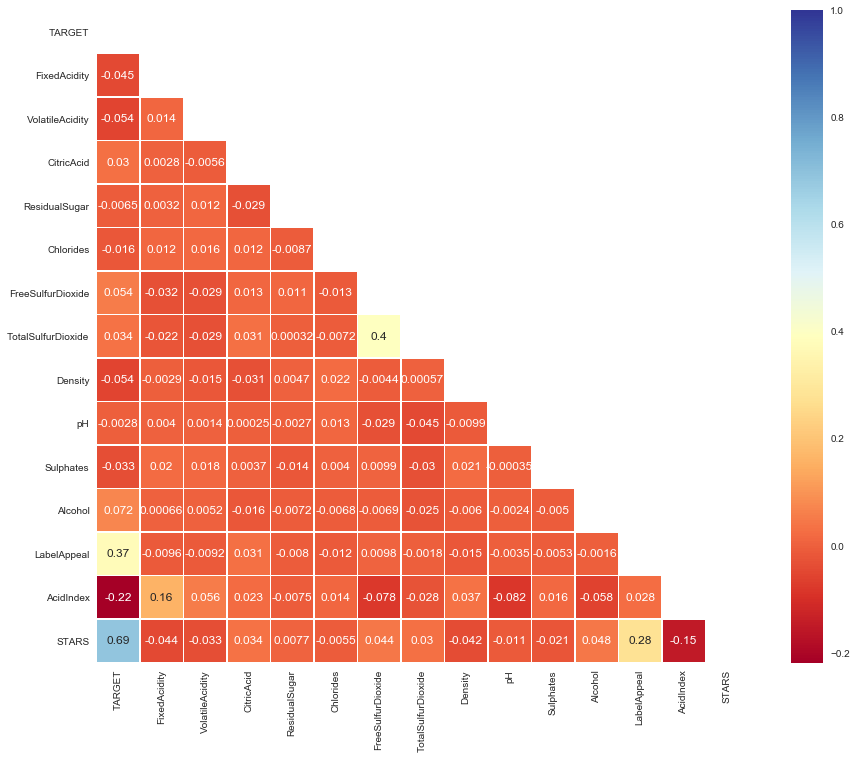

In [244]:
cor_matrix = wine2.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(cor_matrix, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (15, 12))
#Draw the heatmap with the mask and correct aspect ratio, mask=True: upper triangular will be hide
sns.heatmap(cor_matrix, mask=mask,
            square = True, linewidths = 0.5, ax = ax, cmap = "RdYlBu",annot=True)

From above, I could see that STARS, AcidIndex, and LabelAppeal are most correlated with the TARGET variable.

STARS has positive correlation with TARGET value: The higher STARS is, the more wine would be sold.
LabelAppeal has positive correlation with TARGET value: The hihger LabelAppeal is, the more wine would be sold.
AcidIndex has negative correlation with TARGET value: The higher AcidIndex is, the less wine would be sold.

### 2. Selecting columns based on p-value: Backward Elimination

According to [this link](https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf), I will use p-values to select the features.

Compare the correlation between features and remove one of two features that have a correlation higher than 0.9

In [245]:
## Make the dataset has only those columns with correlation less than 0.9
columns = np.full((cor_matrix.shape[0],), True, dtype=bool)
for i in range(cor_matrix.shape[0]):
    for j in range(i+1, cor_matrix.shape[0]):
        if cor_matrix.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = wine2.columns[columns]
wine2 = wine2[selected_columns]

In [246]:
wine2 = pd.DataFrame(wine2)

In [247]:
selected_columns

Index(['TARGET', 'FixedAcidity', 'VolatileAcidity', 'CitricAcid',
       'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide',
       'Density', 'pH', 'Sulphates', 'Alcohol', 'LabelAppeal', 'AcidIndex',
       'STARS'],
      dtype='object')

Next I will select the columns based on how they affect the p-value.

In [248]:
selected_columns = selected_columns[1:]
import statsmodels.formula.api as sm
import statsmodels.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05
data_modeled, selected_columns = backwardElimination(wine2.iloc[:,1:].values, wine2.iloc[:,0].values, SL, selected_columns)

In [251]:
data_modeled

array([[ 1.16      ,  0.9928    ,  9.9       ,  2.        ,  8.        ,
         2.        ],
       [ 0.16      ,  1.02792   , 10.13333333,  1.        ,  7.        ,
         3.        ],
       [ 0.385     ,  0.9964    ,  6.2       ,  1.        ,  6.        ,
         1.        ],
       ...,
       [ 0.17      ,  0.99076   , 12.3       ,  2.        ,  6.        ,
         2.        ],
       [ 0.32      ,  0.9906    , 11.        ,  1.        ,  6.        ,
         2.        ],
       [ 0.04      ,  0.99454   ,  9.9       ,  2.        ,  7.        ,
         2.        ]])

In [252]:
selected_columns

Index(['VolatileAcidity', 'Density', 'Alcohol', 'LabelAppeal', 'AcidIndex',
       'STARS'],
      dtype='object')

Creating a Dataframe with the columns selected using the p-value and correlation

In [254]:
data = pd.DataFrame(data = data_modeled, columns = selected_columns)
data

,VolatileAcidity,Density,Alcohol,LabelAppeal,AcidIndex,STARS
0,1.160,0.99280,9.900000,2.0,8.0,2.0
1,0.160,1.02792,10.133333,1.0,7.0,3.0
2,0.385,0.99640,6.200000,1.0,6.0,1.0
3,0.220,0.94724,12.600000,2.0,8.0,4.0
4,0.220,1.05918,10.200000,2.0,10.0,2.0
...,...,...,...,...,...,...
6288,0.790,1.01077,4.900000,3.0,5.0,0.0
6289,0.470,0.99518,9.517284,1.0,8.0,2.0
6290,0.170,0.99076,12.300000,2.0,6.0,2.0
6291,0.320,0.99060,11.000000,1.0,6.0,2.0


## Regression Modeling

Now that I have my data prepared, I will begin building regression models, I will begin with building multiple linear regression models.

I will create two multiple linear regression models.  
- The first model will use the following predictor variables: STARS, AcidIndex, and LabelAppeal. Since they are variales which are strong correlations with TARGET selected by correlation heatmap.
- The second model will use predictor variables which will be chosen automatically embedded method.

### Model 1 - Using features selected by correlation heatmaps

those variables selected by correlations heatmaps are: 
- LabelAppeal
- AcidIndex
- STARS

In [327]:
#import statsmodels 
import statsmodels.api as sm
import statsmodels.formula.api as smf

#create a model with the variables chosen for model1
multipleregression1=wine2[['STARS','AcidIndex','LabelAppeal']]
multipleregression1=sm.add_constant(multipleregression1)
t = sm.OLS(wine2['TARGET'], multipleregression1)
multipleregression1_fit = t.fit()

#print the results
print(multipleregression1_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 TARGET   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     2324.
Date:                Wed, 12 Aug 2020   Prob (F-statistic):               0.00
Time:                        19:26:49   Log-Likelihood:                -10683.
No. Observations:                6293   AIC:                         2.137e+04
Df Residuals:                    6289   BIC:                         2.140e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.2249      0.110     20.140      

From above, I could see that the signs of coefficients of different features manifest the same correlation relationship with TARGET, the standard error of AcidIndex is the smallest, the standard error of LabelAppeal is the highest, all variables' p values are very small, the model's R square value is 0.526, the model's log-likelihood is -10683, AIC is 21370, BIC is 21400.

In [328]:
#define a function to print the scores
#reference: S_Ferrari's code
def display_scores(scores):
    '''takes scores from a cross validation as input and outputs the scores, mean, and standard deviation'''
    print("RMSE Scores:", scores)
    print("RMSE Mean:", scores.mean())
    print("RMSE Standard Deviation:", scores.std())

Since there are 6293 rows after transformation, I would choose k-fold class validation with 7 folds since 6293/7 = 899 is an integer value.

In [329]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

#Assign the linear regression model to a variable
linearmodel = LinearRegression()

## Use k-fold cross validation with 7 folds
## Use neg_mean_squared_error as scoring since there is no mean_squared_error scoring
results1 = cross_val_score(linearmodel, multipleregression1, wine2['TARGET'], scoring = "neg_mean_squared_error", cv=7)

#Take the square root of the negative of the scores to get the accurate RMSE values
rmseresults1 = np.sqrt(-results1)
#Print results
display_scores(rmseresults1)

RMSE Scores: [1.35421985 1.31660963 1.35749154 1.26555229 1.34736236 1.32847528
 1.28612096]
RMSE Mean: 1.3222617022486882
RMSE Standard Deviation: 0.03270031296035314


Visualize the model's prediction ability:
reference from: [this link](https://www.scikit-yb.org/en/latest/api/regressor/peplot.html)

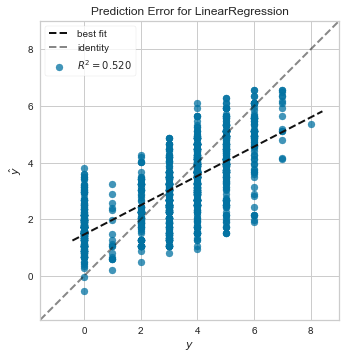

In [330]:
from sklearn.model_selection import train_test_split
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError

X = multipleregression1
y = wine2['TARGET']
# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
visualizer = PredictionError(linearmodel)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

### Model 2 - Using features selected based on p-values (Backward Elimination):

The Backward Elimination function defined above picked the variables which have p-values less than 0.05, those variables are: 
- Volatile Acidity
- Density
- Alcohol
- LabelAppeal
- AcidIndex
- STARS

I will use those variables to construct the second multiple linear regression model:

In [331]:
#create a model with the variables chosen for model1
multipleregression2=wine2[['VolatileAcidity','Density','Alcohol','LabelAppeal','AcidIndex','STARS']]
multipleregression2=sm.add_constant(multipleregression2)
t2 = sm.OLS(wine2['TARGET'], multipleregression2)
multipleregression1_fit = t2.fit()

#print the results
print(multipleregression1_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 TARGET   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     1172.
Date:                Wed, 12 Aug 2020   Prob (F-statistic):               0.00
Time:                        19:26:55   Log-Likelihood:                -10668.
No. Observations:                6293   AIC:                         2.135e+04
Df Residuals:                    6286   BIC:                         2.140e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.5885      0.645     

In the correlation heatmap, volatile Acidity has negative correlation with TARGET, Density has negative correlation with TARGET, Alcohol has positive correlation with TARGET, LabelAppeal has positive correlation with TARGET, AcidIndex has negative correlation with TARGET, STARS has positive correlation with TARGET.

From above, I could see that the signs of coefficients of these features manifest the same correlation relationship with TARGET, the standard error of Alcohol is the smallest, the standard error of Density is the highest, all variables' p values are very small, the model's R square value is 0.528, the model's log-likelihood is -10668, AIC is 21350, BIC is 21400.

In [332]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

#Assign the linear regression model to a variable
linearmodel = LinearRegression()

## Use k-fold cross validation with 7 folds
## Use neg_mean_squared_error as scoring since there is no mean_squared_error scoring
results2 = cross_val_score(linearmodel, multipleregression2, wine2['TARGET'], scoring = "neg_mean_squared_error", cv=7)

#Take the square root of the negative of the scores to get the accurate RMSE values
rmseresults2 = np.sqrt(-results2)
#Print results
display_scores(rmseresults2)

RMSE Scores: [1.34784827 1.31439809 1.35883294 1.25983592 1.34740069 1.32655811
 1.28201533]
RMSE Mean: 1.31955561984146
RMSE Standard Deviation: 0.0341632239330641


Visualize the model's prediction ability:

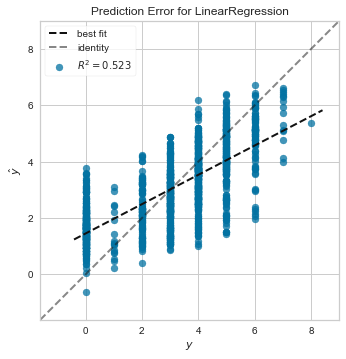

In [302]:
from sklearn.model_selection import train_test_split
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError

X = multipleregression2
y = wine2['TARGET']
# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
visualizer = PredictionError(linearmodel)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show() 

Make a table to compare their result:

<table>
  <thead>
    <tr>
      <th>Comparative term: </th>
      <th>The first MLM </th>
      <th>The second MLM</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>RMSE Mean</td>
      <th>1.3222617022486882</th>
      <th>1.31955561984146</th>
      </tr>
     <tr>
      <td>RMSE Standard Deviation</td>
      <th>0.03270031296035314</th>
      <th>0.0341632239330641</th>
      </tr>
     <tr>
      <td>R^2</td>
      <th>0.526</th>
      <th>0.528</th>
      </tr>
     <tr>
      <td>AIC</td>
      <th>21370</th>
      <th>21350</th>
      </tr>
     <tr>
      <td>BIC</td>
      <th>21400</th>
      <th>21400</th>
      </tr>
     <tr>
      <td>Visualization's R^2</td>
      <th>0.520</th>
      <th>0.523</th>
      </tr>
  </tbody>
</table>

I would see that:
- the RMSE Standard Deviation of the second multiple linear regression model is a little higher than the RMSE Standard Deviation of the first multiple linear regression model
- the RMSE Standard Deviation of the second multiple linear regression model is a little lower than the RMSE Mean of the first multiple linear regression model is a little higher than the second multiple linear regression model.
- the second multiple linear regression model's R^2 is a little higher than the first multiple linear regression model. 
- the first multiple regression model's AIC is a little higher than the second multiple linear regression model's AIC. They have the same BIC. 
- The second model's visualization's R^2 is a little higher than the first model's visualization's R^2. 


Overall, the second multiple linear regression model performs a little better than the first multiple linear regression model.

## Poisson Regression Models

The prerequisite of Poission Regression Model is that, the mean and variance of the response variable should be the same, therefore, let me check whether the TARGET value has same value between mean and variance. 

In [303]:
#Show the mean and variance of target variable
print('TARGET mean:', wine2['TARGET'].mean(),)
print('TARGET variance:', wine2['TARGET'].std()**2)

TARGET mean: 3.082154775146989
TARGET variance: 3.6825375049664015


It shows that the variance of TARGET is not exactly same as the mean of TARGET, the variance of TARGET is a little higher than the mean of TARGET. However, with the requirment of the assignemnt, I would construct two Poisson regression models either, to compare their performance:

### Model 1 - Using features selected by correlation heatmaps

those variables selected by correlations heatmaps are: 
- LabelAppeal
- AcidIndex
- STARS

In [315]:
poissonmodel1 = wine2[['STARS','AcidIndex','LabelAppeal']]
poissonmodel1=sm.add_constant(poissonmodel1)
poissonresults1 = sm.GLM(wine2['TARGET'],poissonmodel1,family=sm.families.Poisson()).fit()

In [316]:
#Print the first Poisson regression model's result
print(poissonresults1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 TARGET   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6289
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11516.
Date:                Wed, 12 Aug 2020   Deviance:                       7121.6
Time:                        19:16:31   Pearson chi2:                 5.22e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.8884      0.053     16.844      

From above, I could see that the signs of coefficients of different features manifest the same correlation relationship with TARGET, the standard errors of STARS and AcidIndex are the smallest (The difference here with the first multiple linear regression model is that, STARS become the one with smallest std in the first Poisson regression model, which means the first Poisson regression model predicts the coefficient of STARS better than the first multiple linear regression model did) the standard error of LabelAppeal is the highest (This part is the same as the first multiple linear regresssion model) all variables' p values are very small, the first Poisson model's Df Residuals is 6289, while its Devianceis 7121.6, its Pearson chi2 is 5220. 

Then, the same process as above to calculate this model's RMSE: 

In [317]:
from sklearn.linear_model import PoissonRegressor
poissonmodel = PoissonRegressor()

#use k-fold cross validation with 7 folds
poissonmodel1 = cross_val_score(poissonmodel, poissonmodel1, wine2['TARGET'], scoring = "neg_mean_squared_error", cv=7)

#take the square root of the negative of the scores to get the accurate RMSE values
rmseresults3 = np.sqrt(-poissonmodel1)

#print results
display_scores(rmseresults3)

RMSE Scores: [1.41586101 1.37141593 1.4079007  1.34470928 1.40236866 1.38679905
 1.36897977]
RMSE Mean: 1.385433485606563
RMSE Standard Deviation: 0.023436698980308857


### Model 2 - Using features selected based on p-values (Backward Elimination):

In the second multiple linear regression model, I found that although the second model with increased variables has improved a little, but the explanantory variable "Density" has much larger standard deviation than others, therefore, I decide to discard this variable in the construction of second Poisson regression model, and using the following explanatory variables:

- Volatile Acidity
- Alcohol
- LabelAppeal
- AcidIndex
- STARS

In [333]:
poissonmodel2 = wine2[['VolatileAcidity','Alcohol','LabelAppeal','AcidIndex','STARS']]
poissonmodel2=sm.add_constant(poissonmodel2)
poissonresults2 = sm.GLM(wine2['TARGET'],poissonmodel2,family=sm.families.Poisson()).fit()

In [334]:
#Print the second Poisson regression model's result
print(poissonresults2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 TARGET   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6287
Model Family:                 Poisson   Df Model:                            5
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11510.
Date:                Wed, 12 Aug 2020   Deviance:                       7108.6
Time:                        19:34:57   Pearson chi2:                 5.21e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.8380      0.059     

From above, I could see that the signs of coefficients of different features manifest the same correlation relationship with TARGET, the standard error of Alcohol is the smallest, the standard error of VolatileAcidity is the highest. All variables' p values are very small, except the p-value of Volatile Acidity, the second Poisson model's Df Residuals is 6287, while its Devianceis 7108.6, its Pearson chi2 is 5210. 

In [335]:
from sklearn.linear_model import PoissonRegressor
poissonmodel = PoissonRegressor()

#use k-fold cross validation with 7 folds
poissonmodel2 = cross_val_score(poissonmodel, poissonmodel2, wine2['TARGET'], scoring = "neg_mean_squared_error", cv=7)

#take the square root of the negative of the scores to get the accurate RMSE values
rmseresults4 = np.sqrt(-poissonmodel2)

#print results
display_scores(rmseresults4)

RMSE Scores: [1.41181079 1.3691475  1.40973487 1.34146226 1.4015533  1.38324343
 1.36515619]
RMSE Mean: 1.3831583338389828
RMSE Standard Deviation: 0.024274032999719426


The variable VolatileAcidity seems not a provider in the construction of Poisson regression model, since it has high p-value and high standard deviation, therefore, I decide to discard this variable and use new set of explanatory variables to construct the third Poisson regression model:

- Alcohol
- LabelAppeal
- AcidIndex
- STARS

In [337]:
poissonmodel3 = wine2[['Alcohol','LabelAppeal','AcidIndex','STARS']]
poissonmodel3=sm.add_constant(poissonmodel3)
poissonresults3 = sm.GLM(wine2['TARGET'],poissonmodel3,family=sm.families.Poisson()).fit()

In [338]:
#Print the third Poisson regression model's result
print(poissonresults3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 TARGET   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6288
Model Family:                 Poisson   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11512.
Date:                Wed, 12 Aug 2020   Deviance:                       7113.6
Time:                        19:58:39   Pearson chi2:                 5.21e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.8186      0.058     14.049      

From above, I could see that the signs of coefficients of different features manifest the same correlation relationship with TARGET, the standard error of Alcohol is the smallest, the standard error of LabelAppeal is the highest. All variables' p values are very small, the third Poisson model's Df Residuals is 6288, while its Deviance is 7113.6, its Pearson chi2 is 5210. 

In [339]:
from sklearn.linear_model import PoissonRegressor
poissonmodel = PoissonRegressor()

#use k-fold cross validation with 7 folds
poissonmodel3 = cross_val_score(poissonmodel, poissonmodel3, wine2['TARGET'], scoring = "neg_mean_squared_error", cv=7)

#take the square root of the negative of the scores to get the accurate RMSE values
rmseresults5 = np.sqrt(-poissonmodel3)

#print results
display_scores(rmseresults5)

RMSE Scores: [1.41240469 1.36985831 1.40924735 1.34233896 1.40185769 1.38348791
 1.36512772]
RMSE Mean: 1.3834746613431115
RMSE Standard Deviation: 0.024063234412427095


Make a table to compare their result:

<table>
  <thead>
    <tr>
      <th>Comparative term: </th>
      <th>The first PRM </th>
      <th>The second PRM </th>
      <th>The third PRM</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>RMSE Mean</td>
      <th>1.385433485606563</th>
      <th>1.3831583338389828</th>
      <th>1.3834746613431115</th>
      </tr>
     <tr>
      <td>RMSE Standard Deviation</td>
      <th>0.023436698980308857</th>
      <th>0.024274032999719426</th>
      <th>0.024063234412427095</th>
      </tr>
     <tr>
      <td>Df Residuals</td>
      <th>6289</th>
      <th>6287</th>
      <th>6288</th>
      </tr>
     <tr>
      <td>Log Likelihood</td>
      <th>-11516</th>
      <th>-11510</th>
      <th>-11512</th>
      </tr>
     <tr>
      <td>Deviance</td>
      <th>7121.6</th>
      <th>7108.6</th>
      <th>7113.6</th>
      </tr>
     <tr>
      <td>Pearson chi2</td>
      <th>5220</th>
      <th>5210</th>
      <th>5210</th>
      </tr>
  </tbody>
</table>

From the table I could see that
- the first Poisson regression model's RMSE Mean is larger than others.
- the second Poisson regression model's RMSE Standard Deviation is larger than others.
- the first Poisson regression model's Df Residuals is the largest.
- the second Poisson regression model's Df Residuals is the smallest. 
- the second Poisson regression model's highest.
- the second Poisson regression model's Deviance is lowest.
- the first Poisson regression model's Pearson chi is highest.

Overall, the secod Poisson regression model outperforms amongst these three models constructed.

## Negative Binomial Regression Models

The Negative Binomial regression model is one such model that does not make the variance = mean assumption about the data. The steps are following with [this link](https://towardsdatascience.com/negative-binomial-regression-f99031bb25b4)

### Model 1 - Using features selected by correlation heatmaps

those variables selected by correlations heatmaps are: 
- LabelAppeal
- AcidIndex
- STARS

#### Step 1: Fit the Poisson regression model on the data set. This will give us the vector of fitted rates:

In [340]:
STARS = wine2['STARS']
LabelAppeal = wine2['LabelAppeal']
TARGET = wine2['TARGET']
AcidIndex = wine2['AcidIndex']

In [341]:
expr = 'TARGET ~ STARS + LabelAppeal + AcidIndex'

In [344]:
from patsy import dmatrices
y_train, X_train = dmatrices(expr, wine2, return_type = 'dataframe')
y_test, X_test = dmatrices(expr, wine2, return_type = 'dataframe')

In [346]:
poisson_training_results = sm.GLM(y_train,X_train, family = sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 TARGET   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6289
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11516.
Date:                Wed, 12 Aug 2020   Deviance:                       7121.6
Time:                        20:42:59   Pearson chi2:                 5.22e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.8884      0.053     16.844      

This completes the STEP 1: fitting the Poisson regression model.

#### Step 2: I will now fit the auxiliary OLS regression model on the data set and use the fitted model to get the value of $\alpha$, add the fitted rates as a new column called "lambda" to the Data Frame of the training data set.

In [347]:
wine2['Lambda'] = poisson_training_results.mu

Next, add a derived column called "AUXOLS" to the pandas Data Frame. This new column will store the values of the dependent variables of the OLS regression. 

In [348]:
wine2['AUXOLS'] = wine2.apply(lambda x: ((x['TARGET'] - x['Lambda'])**2 - x['TARGET'])/x['Lambda'], axis = 1)

I want to tell pasty AUXOLS is the dependent variable and it is explained by lambda, the -1 at the end of the expression is pasty syntax for saying: do not use an intercept of regression, just fit a straight line passing through the origin:

In [349]:
olsexpr = 'AUXOLS ~ Lambda - 1'

I am now ready to fit an OLSR model: 

In [351]:
result = smf.ols(olsexpr, wine2).fit()
print(result.params)

Lambda   -0.09798
dtype: float64


I have seen a single coefficient being printed out corresponding to the single regression variable Lambda. This coefficent is $\alpha$ that I am seeking.

Is $\alpha$ statistically significant? The OLS results object contains the t-score of the regression coefficient $\alpha$. Let's print it out:

In [352]:
result.tvalues

Lambda   -22.157006
dtype: float64

From a t-value calculator, I see the threshold t-score at a 95% confidence level with degrees of freedom=6293 is -1.9603 (one-sided). This is more than the t-statistic of $\alpha$ which was -22.157006. I conclude that I have to reject the null hypothesis of  $\alpha$>0.  

So the requirements for a Negative Binomial regression are not met. 

#### Step 3: Supply the value of alpha found in STEP 2 into the statsmodels.genmod.families.family.NegativeBinomial class, and train the Negative Binomial model on the training data set:

In [353]:
nb1_training_result = sm.GLM(y_train, X_train, family = sm.families.NegativeBinomial(alpha = result.params[0])).fit()
print(nb1_training_result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 TARGET   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6289
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 12 Aug 2020   Deviance:                       8828.5
Time:                        20:58:11   Pearson chi2:                 6.75e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.8530      0.043     20.010      

From the table, I could see that the signs of coefficients of different features manifest the same correlation relationship with TARGET, AcidIndex and STARS both have lowest standard deviation, and the p-values of all the variables are very small, the Df Residuals is 6289, the Deviance is 8828.5, the Pearson chi2 is 6750. 

Next, I will construct negative binomial regression model using sklearn's pre-built function, reference from [this link](https://www.statsmodels.org/devel/generated/statsmodels.discrete.discrete_model.NegativeBinomial.html)

In [358]:
#import the model 
from statsmodels.discrete.discrete_model import NegativeBinomial

#fit the model 
nbmodel1 = NegativeBinomial(wine2['TARGET'], wine2[['LabelAppeal','AcidIndex','STARS']])
nbmodel1_fit = nb_model1.fit(maxiter=6000)
print(nbmodel1_fit.summary())

Optimization terminated successfully.
         Current function value: 1.853171
         Iterations: 19
         Function evaluations: 20
         Gradient evaluations: 20
                     NegativeBinomial Regression Results                      
Dep. Variable:                 TARGET   No. Observations:                 6293
Model:               NegativeBinomial   Df Residuals:                     6290
Method:                           MLE   Df Model:                            2
Date:                Wed, 12 Aug 2020   Pseudo R-squ.:                  0.1277
Time:                        21:40:16   Log-Likelihood:                -11662.
converged:                       True   LL-Null:                       -13370.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
LabelAppeal     0.1739        nan   

Next I will calculate the RMSE for the first negative binomial model I constructed:

In [359]:
## Reference from S_Ferrari's code 
predictions_nb1 = nbmodel1_fit.predict(wine2[['LabelAppeal','AcidIndex','STARS']])

RMSE_nb1=(np.sqrt(np.sum(np.power(np.subtract(predictions_nb1, wine2['TARGET']),2)/len(wine2[['LabelAppeal','AcidIndex','STARS']]))))

print('RMSE for Negative Binomial Model 1:',round(RMSE_nb1,5))

RMSE for Negative Binomial Model 1: 1.43919


### Model 2 - Using features that are used for the construction of second Poisson model

- Volatile Acidity
- Alcohol
- LabelAppeal
- AcidIndex
- STARS

Go through the same procedure above in one box:

In [361]:
# Step 1: Fit the Poisson regression model on the data set. This will give us the vector of fitted rates:
STARS = wine2['STARS']
LabelAppeal = wine2['LabelAppeal']
TARGET = wine2['TARGET']
AcidIndex = wine2['AcidIndex']
Alcohol = wine2['Alcohol']
VolatileAcidity = wine2['VolatileAcidity']
expr = 'TARGET ~ STARS + LabelAppeal + AcidIndex + Alcohol + VolatileAcidity'
from patsy import dmatrices
y_train, X_train = dmatrices(expr, wine2, return_type = 'dataframe')
y_test, X_test = dmatrices(expr, wine2, return_type = 'dataframe')
poisson_training_results = sm.GLM(y_train,X_train, family = sm.families.Poisson()).fit()
# Step 2: I will now fit the auxiliary OLS regression model on the data set and use the fitted model 
# to get the value of $\alpha$, add the fitted rates as a new column called "lambda" to the 
# Data Frame of the training data set.
wine2['Lambda'] = poisson_training_results.mu
wine2['AUXOLS'] = wine2.apply(lambda x: ((x['TARGET'] - x['Lambda'])**2 - x['TARGET'])/x['Lambda'], axis = 1)
olsexpr = 'AUXOLS ~ Lambda - 1'
result = smf.ols(olsexpr, wine2).fit()
result.tvalues

Lambda   -22.329904
dtype: float64

From a t-value calculator, I see the threshold t-score at a 95% confidence level with degrees of freedom=6293 is -1.9603 (one-sided). This is more than the t-statistic of $\alpha$ which was -22.329904. I conclude that I have to reject the null hypothesis of  $\alpha$>0.  

So the requirements for a Negative Binomial regression are not met. 

In [362]:
# Step 3: Supply the value of alpha found in STEP 2 into the 
# statsmodels.genmod.families.family.NegativeBinomial class, 
# and train the Negative Binomial model on the training data set:
nb2_training_result = sm.GLM(y_train, X_train, family = sm.families.NegativeBinomial(alpha = result.params[0])).fit()
print(nb2_training_result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 TARGET   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6287
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 12 Aug 2020   Deviance:                       8822.6
Time:                        21:57:57   Pearson chi2:                 6.74e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.8008      0.047     

From the table, I could see that the signs of coefficients of different features manifest the same correlation relationship with TARGET. Alcohol has lowest standard deviation, and the p-values of all the variables are very small, the Df Residuals is 6287, the Deviance is 8822.6, the Pearson chi2 is 6740. 

Next, I will construct negative binomial regression model using sklearn's pre-built function, reference from [this link](https://www.statsmodels.org/devel/generated/statsmodels.discrete.discrete_model.NegativeBinomial.html)

In [364]:
#import the model 
from statsmodels.discrete.discrete_model import NegativeBinomial

#fit the model 
nbmodel2 = NegativeBinomial(wine2['TARGET'], wine2[['VolatileAcidity','Alcohol','LabelAppeal','AcidIndex','STARS']])
nbmodel2_fit = nbmodel2.fit(maxiter=6000)
print(nbmodel2_fit.summary())

         Current function value: 1.845307
         Iterations: 28
         Function evaluations: 72
         Gradient evaluations: 63
                     NegativeBinomial Regression Results                      
Dep. Variable:                 TARGET   No. Observations:                 6293
Model:               NegativeBinomial   Df Residuals:                     6288
Method:                           MLE   Df Model:                            4
Date:                Wed, 12 Aug 2020   Pseudo R-squ.:                  0.1314
Time:                        22:01:28   Log-Likelihood:                -11613.
converged:                      False   LL-Null:                       -13370.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
VolatileAcidity    -0.0024      0.021     -0.115      0.909      -

Next I will calculate the RMSE for the second negative binomial model I constructed:

In [366]:
## Reference from S_Ferrari's code 
predictions_nb2 = nbmodel2_fit.predict(wine2[['VolatileAcidity','Alcohol','LabelAppeal','AcidIndex','STARS']])

RMSE_nb2=(np.sqrt(np.sum(np.power(np.subtract(predictions_nb2, wine2['TARGET']),2)/len(wine2[['VolatileAcidity','Alcohol','LabelAppeal','AcidIndex','STARS']]))))

print('RMSE for Negative Binomial Model 2:',round(RMSE_nb2,5))

RMSE for Negative Binomial Model 2: 1.42316


Make a table to compare their result:

<table>
  <thead>
    <tr>
      <th>Comparative term: </th>
      <th>The first PRM </th>
      <th>The second PRM </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>RMSE </td>
      <th>1.43919</th>
      <th>1.42316</th>
      </tr>
     <tr>
      <td>Df Residuals</td>
      <th>6290</th>
      <th>6288</th>
      </tr>
     <tr>
      <td>Pseudo R^2</td>
      <th>0.1277</th>
      <th>0.1314</th>
      </tr>
     <tr>
      <td>Log Likelihood</td>
      <th>-11662</th>
      <th>-11613</th>
      </tr>
     <tr>
      <td>Deviance</td>
      <th>8828.5</th>
      <th>8822.6</th>
      </tr>
     <tr>
      <td>Pearson chi2</td>
      <th>6750</th>
      <th>6740</th>
      </tr>
  </tbody>
</table>

No matter in which aspect, the second binomial regression model I constructed is better than the first binomial regression model I constricted. 

## Zero inflated Poisson regression model

Since there are a lot of zeros values in response variable, I would construct one extra regression model: Zero-flated regression model. The tutorial of how to construct zero inflated Poisson regression model is [here](https://towardsdatascience.com/an-illustrated-guide-to-the-zero-inflated-poisson-model-b22833343057)

First, Let me print out the frequency distribution of TARGET values:

In [383]:
wine2.groupby('TARGET').count()

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS,Lambda,AUXOLS
TARGET,,,,,,,,,,,,,,,,
0.0,1293,1293,1293,1293,1293,1293,1293,1293,1293,1293,1293,1293,1293,1293,1293,1293
1.0,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121
2.0,507,507,507,507,507,507,507,507,507,507,507,507,507,507,507,507
3.0,1292,1292,1292,1292,1292,1292,1292,1292,1292,1292,1292,1292,1292,1292,1292,1292
4.0,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579
5.0,1023,1023,1023,1023,1023,1023,1023,1023,1023,1023,1023,1023,1023,1023,1023,1023
6.0,397,397,397,397,397,397,397,397,397,397,397,397,397,397,397,397
7.0,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76
8.0,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


Setup the regression expression in Pasty notation.  

In [384]:
expr = 'TARGET ~ STARS + AcidIndex + LabelAppeal'

Use Pasty to carve out the X and y matrices for the training and testing data sets.

In [385]:
from patsy import dmatrices
y_train, X_train = dmatrices(expr, wine2, return_type = 'dataframe')
y_test, X_test = dmatrices(expr, wine2, return_type = 'dataframe')

Then use statsmodel's ZeroInflatedPoisson class, to build and train a ZIP regression model on the training data set:

- Inflation: The ZeroInflatedPoisson model class will internally use a LogisticRegression model to estimate $\phi$ = Number of zero valued samples / Total number of samples

In [386]:
zip_training_results = sm.ZeroInflatedPoisson(endog=y_train, exog = X_train, exog_infl = X_train, inflation = 'logit').fit()

         Current function value: 1.608737
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38


In [387]:
print(zip_training_results.summary())

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:                  TARGET   No. Observations:                 6293
Model:             ZeroInflatedPoisson   Df Residuals:                     6289
Method:                            MLE   Df Model:                            3
Date:                 Wed, 12 Aug 2020   Pseudo R-squ.:                  0.1622
Time:                         23:09:37   Log-Likelihood:                -10124.
converged:                       False   LL-Null:                       -12084.
Covariance Type:             nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
inflate_Intercept      -4.4564      0.324    -13.749      0.000      -5.092      -3.821
inflate_STARS          -2.4400      0.088    -27.644      0.000      -2.613      -2.267
inflate_

From the table, I could see that the signs of coefficients of different features manifest the same correlation relationship with TARGET, the intercept is negative, STARS and AcidIndex have lowest standard deviation, the inflated STARS has the lighest standard deviation, and the p-values of all the variables are very small, the Df Residuals is 6289, the pseudo R^2 is 0.1622, the Log-likelihood is -10124. 

Also, the converged is False.

In [392]:
#calculate the RMSE to compare the model to the previous one
X = wine[['STARS','AcidIndex','LabelAppeal']]
X =sm.add_constant(X)
zip_predictions = zip_training_results.predict(X,exog_infl=X)
predicted_counts = round(zip_predictions)
RMSE_Zip=np.sqrt(np.sum(np.power(np.subtract(predicted_counts, wine2['TARGET']),2)/len(X)))
#print
print('RMSE for Zero Inflated Poisson Model:',round(RMSE_Zip,4))

RMSE for Zero Inflated Poisson Model: 1.0868


This completes my look at the Zero-Inflated Poisson regression model. Zero-Inflated Poisson regression model gives me the lowest RMSE. Therefore, it is the best model for me to test the data:

## Testing the data

In [393]:
#read the evaluation dataset file
filename_test = 'https://raw.githubusercontent.com/Bella1025/DAV6150./master/Project1_Eval%20(1).csv'
evaluationdata = pd.read_csv(filename_test)

#check results
evaluationdata.head()

,IN,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,3,NaN,5.4,-0.860,0.27,-10.7,0.092,23.0,398.0,0.98527,5.02,0.64,12.30,-1,6,NaN
1,9,NaN,12.4,0.385,-0.76,-19.7,1.169,-37.0,68.0,0.99048,3.37,1.09,16.00,0,6,2.0
2,10,NaN,7.2,1.750,0.17,-33.0,0.065,9.0,76.0,1.04641,4.61,0.68,8.55,0,8,1.0
3,18,NaN,6.2,0.100,1.80,1.0,-0.179,104.0,89.0,0.98877,3.20,2.11,12.30,-1,8,1.0
4,21,NaN,11.4,0.210,0.28,1.2,0.038,70.0,53.0,1.02899,2.54,-0.07,4.80,0,10,NaN


In [394]:
# check the dataset for null values
evaluationdata.isnull().sum()

IN                       0
TARGET                3335
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar          168
Chlorides              138
FreeSulfurDioxide      152
TotalSulfurDioxide     157
Density                  0
pH                     104
Sulphates              310
Alcohol                185
LabelAppeal              0
AcidIndex                0
STARS                  841
dtype: int64

I found that LabelAppeal does not have missing values, AcidIndex does not have missing values, but STARS has a lot of missing values, therefore I will impute it with KNN:

In [396]:
testing =evaluationdata[['STARS','AcidIndex','LabelAppeal']].copy()
testing['STARS']=testing.STARS.replace(np.nan, 0)
#Transform LabelAppeal as before, to avoid negative value in LabelAppeal
testing['LabelAppeal']=testing['LabelAppeal']+2
#add constant
testing=sm.add_constant(testing)
#check results
testing.head()

,const,STARS,AcidIndex,LabelAppeal
0,1.0,0.0,6,1
1,1.0,2.0,6,2
2,1.0,1.0,8,2
3,1.0,1.0,8,1
4,1.0,0.0,10,2


Construct the Zero-Inflated Poisson Regression model in the following:

In [400]:
#generate predictions
predictions =round(zip_training_results.predict(testing, exog_infl=testing))
dataprediction = pd.DataFrame({'Actual': wine2['TARGET'], 'Predicted': predictions})
dataprediction.head(25)

,Actual,Predicted
0,3.0,2.0
1,3.0,4.0
2,NaN,3.0
3,3.0,2.0
4,NaN,1.0
5,NaN,6.0
6,NaN,4.0
7,NaN,1.0
8,NaN,0.0
9,6.0,1.0


### I can visualize comparison result as a bar graph using the below script :

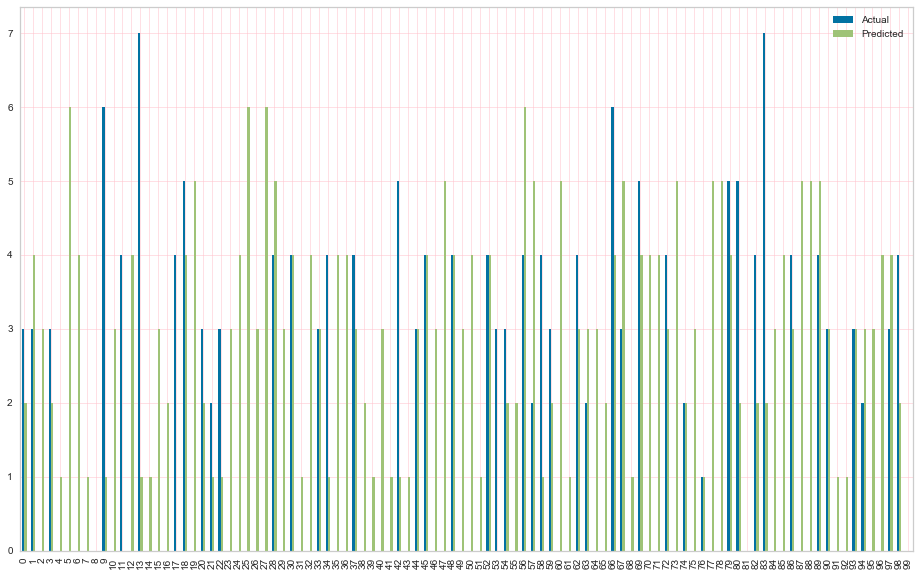

In [401]:
df = dataprediction.head(100)
df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='pink')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

From the plots I could see that except the missing values, the prediction is good.

## Conclusion:

1. From the Exploratory Data Analysis part, I found a lot of missing values and invalid values by domain knowledge, I replace missing values of STARS by 0, then use KNN method to impute other variables.

2. I try to delete the negative values, but the result shows this decision would change the transformations of data too much, therefore, I substitute the negative values by their absolute values.

3. After transformation, the data size has decreased much.

4. For the Feature selection part, first, I use correlation heatmap to select the features that has most correlations with TARGET, they are: STARS, AcidIndex and LabelAppeal. I chose them as features in my every construction of the first model: the first model of multiple regression model, the first model of Poisson regression model, the first model of negative binomial model, also the Zero-infalted Poisson regression model.

5. Also, I use backward eliminations (using p-values test) to choose another set of explanatory variables, they are: Volatile Acidity, Alcohol, STARS, AcidIndex and LabelAppeal. I chose them as features in my every construction of the second model: the second model of multiple regression model, the second model of Poisson regression model, the second model of negative binomial model, they display a better score comparing the first same model.

6. Comparing with RMSE, I found the zero-inflated Poisson regression model is the best model in those models I constructed.

7. Therefore, I use Zero-Inflated Poisson regression model to do my prediction. 

The project reminds of me that in the future if the data set has more zero values than expected, testing Zero-Infalted Poisson Regression Model may be a good choice. 

##  [Video link is here, click it](https://screencast-o-matic.com/watch/cYjIfqG4Df)

Thanks for reading !